# **East Java Water Quality Prediction**
---
**About Me**
<br>
Github: https://github.com/kbagusm <br>
Linkedin: https://www.linkedin.com/in/kbagusm/

# Overview

`In this project, I'm going to predict water quality using machine learning based on observation points in East Java, I will use 5 models to determine which model I think is the best for prediction based on its highest accuracy, including Logistic Regression, Decision Tree, Random Forest, SVM, and XGBoost.

## Dataset

The data named 8FPP21.csv contains processed information about the quality of water. This data was collected from three observation points, including the Cangkir Tambangan River, the Muara Kali Tengah River, and the Sutami Hilir Reservoir, throughout 2021. The data includes seven parameters, pH, BOD, COD, TDS, TSS, DO, and Temperature. Additionally, rainfall data was collected from ARR Kedurus, ARR Karangpilang, and ARR Sutami (ARR stands for Automatic Rain Recording). All datasets have been thoroughly processed and labeled/classified as 1, 2, 3, or 4, based on the water quality standards established by the Indonesian government.

**Source Dataset (Kaggle): [East Java Water Quality Dataset](https://www.kaggle.com/datasets/prasetyawidiharsa/dataset-8-fitur-kualitas-air-jawa-timur-indonesia/data)**

**Feature Definition**

| Columns | Description |
|---|---|
|`Temperatur`|The degree or intensity of heat present in a substance or object|
|`TDS`|Total Dissolved Solids|
|`TSS`|Total Suspended Solids|
|`pH`|Quantitative measure of the acidity or basicity of water|
|`BOD`|Biochemical Oxygen Demand|
|`COD`|Chemical Oxygen Demand|
|`DO`|Dissolved Oxygen|
|`CurahHujan`|The quantity of rain falling|
|`Kelas`|Water quality standards established by the Indonesian government|

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Data Overview

In [2]:
# load data
df = pd.read_csv("8FPP21.csv")
df.head()

,Temperatur,TDS,TSS,pH,BOD,COD,DO,CurahHujan,kelas
0,30.1,108.2,9.5,7.8,6.9,17.2,5.1,8.45,3
1,26.7,108.2,18.2,7.6,14.6,39.9,5.0,8.45,4
2,29.6,108.2,117.7,8.0,11.2,34.3,5.2,3.43,3
3,29.8,108.2,66.1,7.3,12.9,32.8,5.2,3.43,4
4,29.0,108.2,94.3,7.8,8.6,26.0,5.3,7.39,3


In [3]:
df.shape

(213, 9)

213 columns and 9 rows

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperatur   213 non-null    float64
 1   TDS          213 non-null    float64
 2   TSS          213 non-null    float64
 3   pH           213 non-null    float64
 4   BOD          213 non-null    float64
 5   COD          213 non-null    float64
 6   DO           213 non-null    float64
 7   CurahHujan   213 non-null    float64
 8   kelas        213 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 15.1 KB


all numerical columns

In [5]:
df.isnull().sum()

Temperatur     0
TDS            0
TSS            0
pH             0
BOD            0
COD            0
DO             0
CurahHujan     0
kelas          0
dtype: int64

0 missing values

In [6]:
df.duplicated().sum()

0

0 duplicate values

## EDA

In [7]:
df.describe(include='all')

,Temperatur,TDS,TSS,pH,BOD,COD,DO,CurahHujan,kelas
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,28.828638,404.405634,97.744601,7.267136,21.431690,92.529108,3.700235,4.431878,3.441315
std,1.334476,257.198722,134.669312,0.344567,40.745777,173.477325,1.534820,5.958623,0.631397
min,24.300000,107.000000,5.000000,6.400000,1.600000,10.500000,0.100000,0.000000,2.000000
25%,28.000000,227.600000,22.800000,7.000000,4.900000,22.100000,2.800000,0.330000,3.000000
50%,28.900000,299.000000,49.000000,7.200000,7.800000,26.400000,3.800000,2.460000,3.000000
75%,29.700000,624.000000,126.200000,7.500000,12.900000,48.000000,4.800000,6.290000,4.000000
max,33.400000,988.000000,965.000000,8.100000,321.800000,1366.000000,6.900000,37.500000,5.000000


In [8]:
df.head()

,Temperatur,TDS,TSS,pH,BOD,COD,DO,CurahHujan,kelas
0,30.1,108.2,9.5,7.8,6.9,17.2,5.1,8.45,3
1,26.7,108.2,18.2,7.6,14.6,39.9,5.0,8.45,4
2,29.6,108.2,117.7,8.0,11.2,34.3,5.2,3.43,3
3,29.8,108.2,66.1,7.3,12.9,32.8,5.2,3.43,4
4,29.0,108.2,94.3,7.8,8.6,26.0,5.3,7.39,3


In [9]:
df['kelas'].value_counts()

kelas
3    126
4     71
5     13
2      3
Name: count, dtype: int64

since `class` column has a different numbering from the dataser definition above, so the mapping will be done

In [10]:
df['kelas'] = df['kelas'].map({2: 1, 3: 2, 4: 3, 5:4})
df['kelas'].value_counts()

kelas
2    126
3     71
4     13
1      3
Name: count, dtype: int64

### Univariate Analysis

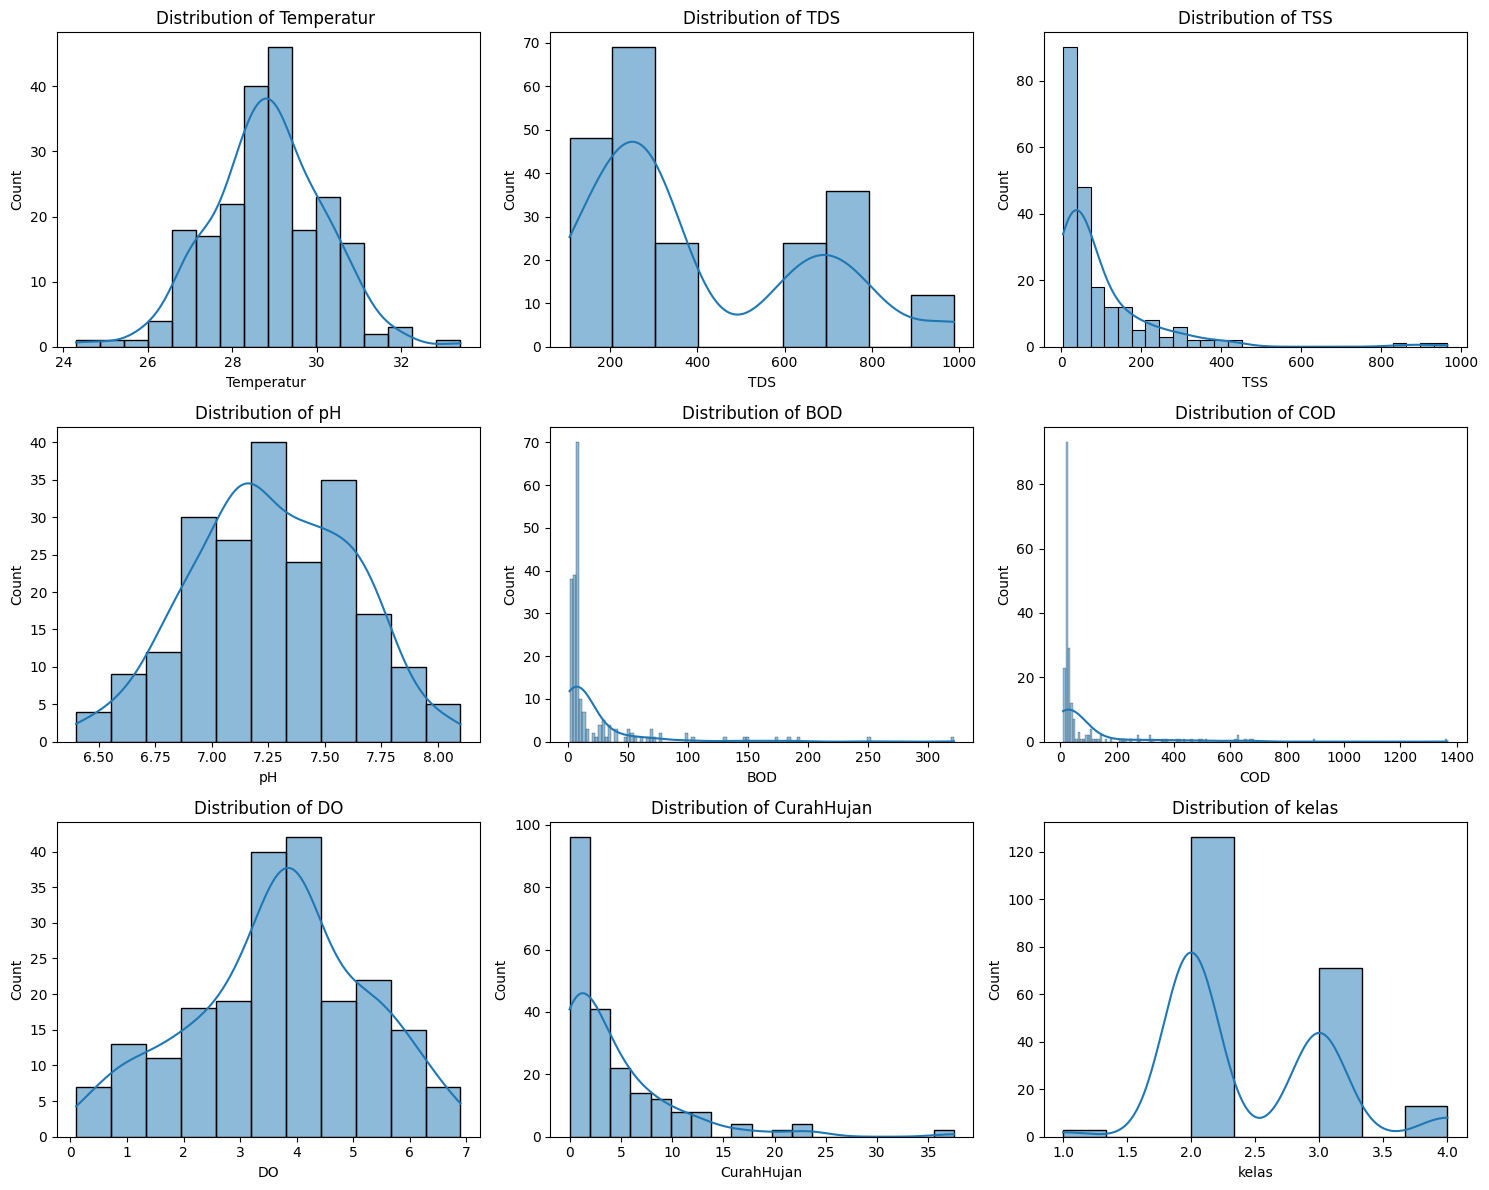

In [11]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.show()

### Bivariate Analysis

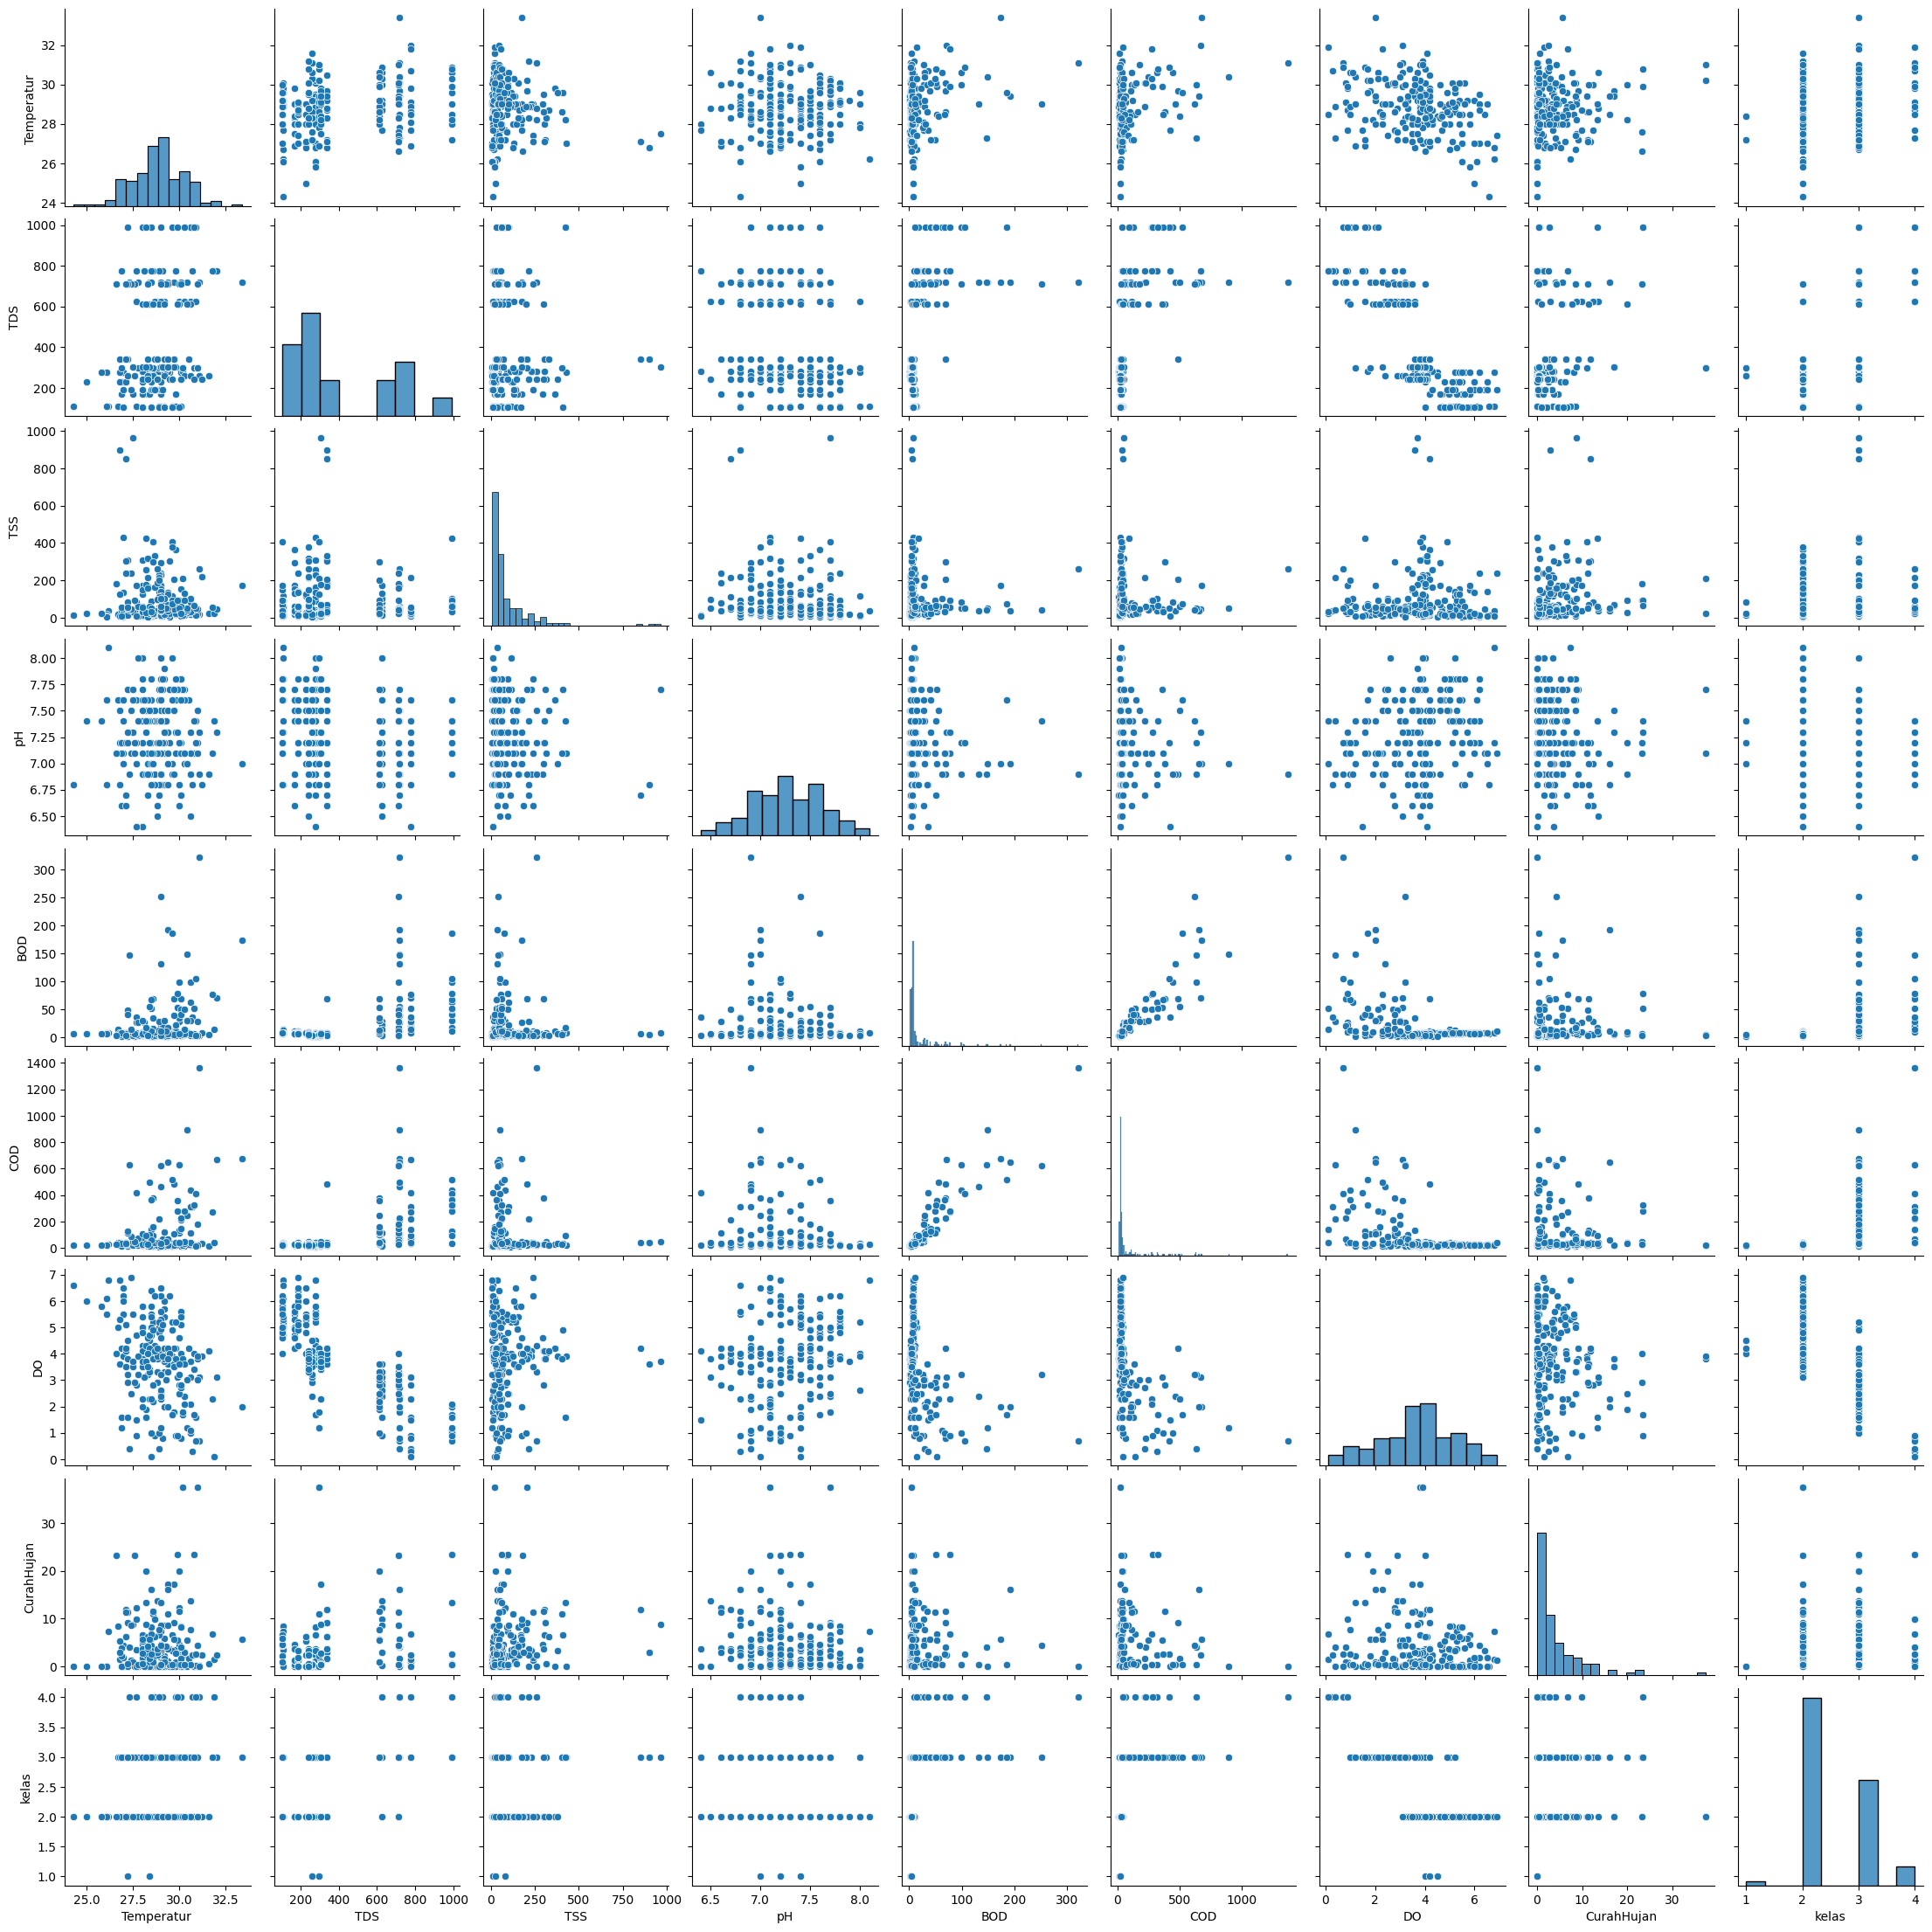

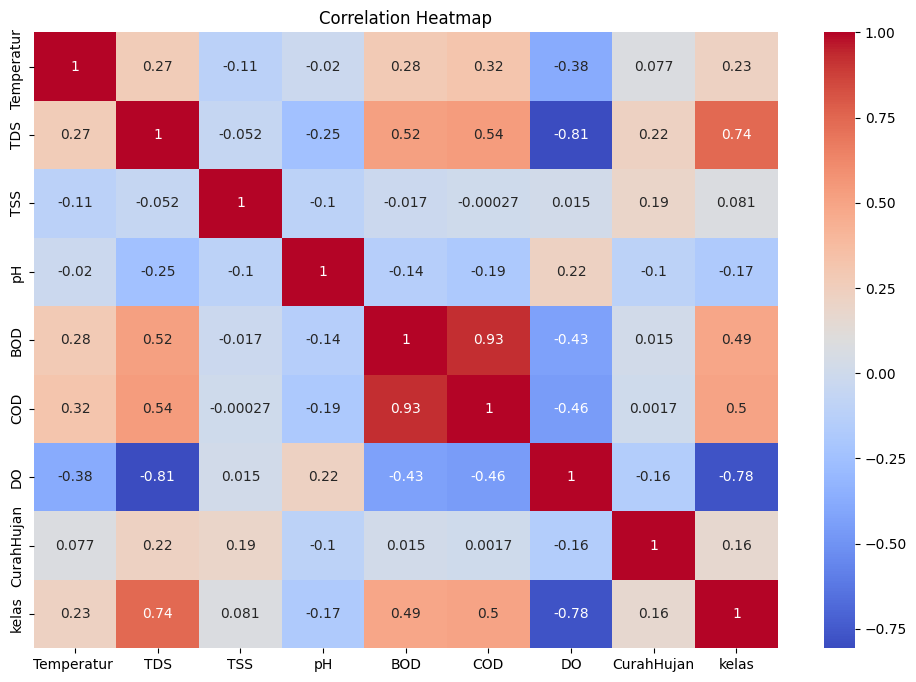

In [12]:
# Pair plot
sns.pairplot(df[numeric_cols])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

`class` column only correlate strongly with `TDS`, `DO`, `COD`, and `BOD`. Then **drop** `TSS` to reduce the dimension.

In [13]:
df = df.drop(columns=['TSS'])
df.head()

,Temperatur,TDS,pH,BOD,COD,DO,CurahHujan,kelas
0,30.1,108.2,7.8,6.9,17.2,5.1,8.45,2
1,26.7,108.2,7.6,14.6,39.9,5.0,8.45,3
2,29.6,108.2,8.0,11.2,34.3,5.2,3.43,2
3,29.8,108.2,7.3,12.9,32.8,5.2,3.43,3
4,29.0,108.2,7.8,8.6,26.0,5.3,7.39,2


In [14]:
df.shape

(213, 8)

`class` will be the target

In [15]:
X = df.drop('kelas', axis=1)
y = df['kelas']

In [16]:
X.head()

,Temperatur,TDS,pH,BOD,COD,DO,CurahHujan
0,30.1,108.2,7.8,6.9,17.2,5.1,8.45
1,26.7,108.2,7.6,14.6,39.9,5.0,8.45
2,29.6,108.2,8.0,11.2,34.3,5.2,3.43
3,29.8,108.2,7.3,12.9,32.8,5.2,3.43
4,29.0,108.2,7.8,8.6,26.0,5.3,7.39


In [17]:
X.shape

(213, 7)

## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X = scaler.fit_transform(X)
X

array([[ 0.95494877, -1.15437358,  1.55011835, ..., -0.43525321,
         0.91415463,  0.67592585],
       [-1.59886917, -1.15437358,  0.96831181, ..., -0.30409212,
         0.84884692,  0.67592585],
       [ 0.57938731, -1.15437358,  2.13192488, ..., -0.33644904,
         0.97946233, -0.16853525],
       ...,
       [ 1.48073481,  2.27438591,  0.38650528, ...,  1.33108797,
        -1.30630749,  3.19585158],
       [-0.47218479,  2.27438591,  0.38650528, ..., -0.00941302,
        -1.3716152 ,  1.50692939],
       [ 0.12871355,  2.27438591,  0.38650528, ..., -0.33991585,
        -1.63284604,  1.50692939]])

## Handling Imbalance Data using SMOTE

In [20]:
df['kelas'].value_counts()

kelas
2    126
3     71
4     13
1      3
Name: count, dtype: int64

because the data is unbalanced, i need to distribute all the data in `kelas` using SMOTE in order to data distribution of each class is balanced

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# sample slass before SMOTE on smallest class
class_counts = Counter(y)
min_class_count = min(class_counts.values())

# set k_neighbors based on sample count
k_neighbors = min(5, min_class_count - 1)

# SMOTE initialization
smote = SMOTE(k_neighbors=k_neighbors)

# fit and resample data
X_resampled, y_resampled = smote.fit_resample(X, y)

# distribution check after SMOTE
print('Class distribution after SMOTE:', Counter(y_resampled))


Class distribution after SMOTE: Counter({2: 126, 3: 126, 1: 126, 4: 126})


## Train Test Split

75% for training and 25% for testing

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

## Modeling

I used 5 models to compare which model gives the best accuracy.
- Logistic Regression
- Decision Tree
- Random Forest
- SVM
- XGBoost

### Logictic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Creating model object
model_lg = LogisticRegression(max_iter=120, random_state=0, n_jobs=20)

# Training Model
model_lg.fit(X_train, y_train)

# Making Prediction
pred_lg = model_lg.predict(X_test)
print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

           1       0.76      1.00      0.86        32
           2       0.93      0.85      0.89        33
           3       0.94      0.65      0.77        26
           4       0.94      0.97      0.96        35

    accuracy                           0.88       126
   macro avg       0.90      0.87      0.87       126
weighted avg       0.90      0.88      0.88       126



In [24]:
# Calculate accuracy, cross-validation score and its mean
acc_lr = accuracy_score(y_test, pred_lg)
scores_lr = cross_val_score(model_lg, X_train, y_train, cv=5)
precision_lr = precision_score(y_test, pred_lg, average='weighted')
recall_lr = recall_score(y_test, pred_lg, average='weighted')
f1_lr = f1_score(y_test, pred_lg, average='weighted')
print("Precision: ", precision_lr)
print("Recall: ", recall_lr)
print("F1-Score: ", f1_lr)
print("Accuracy : ", acc_lr)
print("Cross-validation scores:", scores_lr)
print("Mean cross-validation score:", scores_lr.mean())

Precision:  0.895175107079869
Recall:  0.8809523809523809
F1-Score:  0.8779448004800117
Accuracy :  0.8809523809523809
Cross-validation scores: [0.89473684 0.85526316 0.90789474 0.93333333 0.92      ]
Mean cross-validation score: 0.9022456140350877


### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# DT Parameter
param_grid = {
    'max_depth': [3, 5, 7, 10, 12],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Training Model
model_dt = DecisionTreeClassifier(**best_params, random_state=42)
model_dt.fit(X_train, y_train)

# Making Prediction
pred_dt = model_dt.predict(X_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        32
           2       0.87      1.00      0.93        33
           3       1.00      0.85      0.92        26
           4       1.00      1.00      1.00        35

    accuracy                           0.96       126
   macro avg       0.97      0.95      0.96       126
weighted avg       0.97      0.96      0.96       126



In [26]:
# Calculate accuracy, cross-validation score and its mean
acc_dt = accuracy_score(y_test, pred_dt)
scores_dt = cross_val_score(model_dt, X_train, y_train, cv=5)
precision_dt = precision_score(y_test, pred_dt, average='weighted')
recall_dt = recall_score(y_test, pred_dt, average='weighted')
f1_dt = f1_score(y_test, pred_dt, average='weighted')
print("Precision: ", precision_dt)
print("Recall: ", recall_dt)
print("F1-Score: ", f1_dt)
print("Accuracy : ", acc_dt)
print("Cross-validation scores:", scores_dt)
print("Mean cross-validation score:", scores_dt.mean())

Precision:  0.9655388471177945
Recall:  0.9603174603174603
F1-Score:  0.9603289933605157
Accuracy :  0.9603174603174603
Cross-validation scores: [0.96052632 0.94736842 0.97368421 0.96       0.97333333]
Mean cross-validation score: 0.9629824561403509


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

# Training Model
model_rf.fit(X_train, y_train)

# Making Prediction
pred_rf = model_rf.predict(X_test)
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89        32
           2       0.79      0.82      0.81        33
           3       1.00      0.58      0.73        26
           4       0.95      1.00      0.97        35

    accuracy                           0.87       126
   macro avg       0.89      0.85      0.85       126
weighted avg       0.88      0.87      0.86       126



In [28]:
# Calculate accuracy, cross-validation score and its mean
acc_rf = accuracy_score(y_test, pred_rf)
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5)
precision_rf = precision_score(y_test, pred_rf, average='weighted')
recall_rf = recall_score(y_test, pred_rf, average='weighted')
f1_rf = f1_score(y_test, pred_rf, average='weighted')
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1-Score: ", f1_rf)
print("Accuracy : ", acc_rf)
print("acc_rfCross-validation scores:", scores_rf)
print("Mean cross-validation score:", scores_rf.mean())

Precision:  0.8802697655638831
Recall:  0.8650793650793651
F1-Score:  0.8578859316785539
Accuracy :  0.8650793650793651
acc_rfCross-validation scores: [0.89473684 0.89473684 0.89473684 0.89333333 0.92      ]
Mean cross-validation score: 0.8995087719298246


### SVM

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)

# Making Prediction
pred_svm = model_svm.predict(X_test)
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           1       0.91      1.00      0.96        32
           2       0.86      0.97      0.91        33
           3       0.95      0.73      0.83        26
           4       1.00      0.97      0.99        35

    accuracy                           0.93       126
   macro avg       0.93      0.92      0.92       126
weighted avg       0.93      0.93      0.93       126



In [30]:
# Calculate accuracy, cross-validation score and its mean
acc_svm = accuracy_score(y_test, pred_svm)
scores_svm = cross_val_score(model_svm, X_train, y_train, cv=5)
precision_svm = precision_score(y_test, pred_svm, average='weighted')
recall_svm = recall_score(y_test, pred_svm, average='weighted')
f1_svm = f1_score(y_test, pred_svm, average='weighted')
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("F1-Score: ", f1_svm)
print("Accuracy : ", acc_svm)
print("Accuracy : ", acc_svm)
print("Cross-validation scores:", scores_svm)
print("Mean cross-validation score:", scores_svm.mean())

Precision:  0.9325212968070111
Recall:  0.9285714285714286
F1-Score:  0.9262667241530688
Accuracy :  0.9285714285714286
Accuracy :  0.9285714285714286
Cross-validation scores: [0.89473684 0.93421053 0.92105263 0.93333333 0.90666667]
Mean cross-validation score: 0.9179999999999999


### XGBoost

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Adjust class labels to start from 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Initialize and fit the model
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train_adjusted)

# Making Prediction
pred_xgb_adjusted = model_xgb.predict(X_test)

# Adjust predictions back to original class labels
pred_xgb = pred_xgb_adjusted + 1

# Print classification report
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       0.97      0.97      0.97        33
           3       0.96      0.96      0.96        26
           4       1.00      1.00      1.00        35

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



In [32]:
# Calculate accuracy, cross-validation score and its mean
acc_xgb = accuracy_score(y_test, pred_xgb)
scores_xgb = cross_val_score(model_xgb, X_train, y_train_adjusted, cv=5)
precision_xgb = precision_score(y_test, pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, pred_xgb, average='weighted')
print("Precision: ", precision_xgb)
print("Recall: ", recall_xgb)
print("F1-Score: ", f1_xgb)
print("Accuracy : ", acc_xgb)
print("Accuracy : ", acc_xgb)
print("Cross-validation scores:", scores_xgb)
print("Mean cross-validation score:", scores_xgb.mean())

Precision:  0.9841269841269841
Recall:  0.9841269841269841
F1-Score:  0.9841269841269841
Accuracy :  0.9841269841269841
Accuracy :  0.9841269841269841
Cross-validation scores: [0.96052632 0.98684211 0.97368421 0.97333333 0.98666667]
Mean cross-validation score: 0.9762105263157894


Comparing all of them

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35116\613182783.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy_score', y='Model', data=models_sorted, palette='viridis')


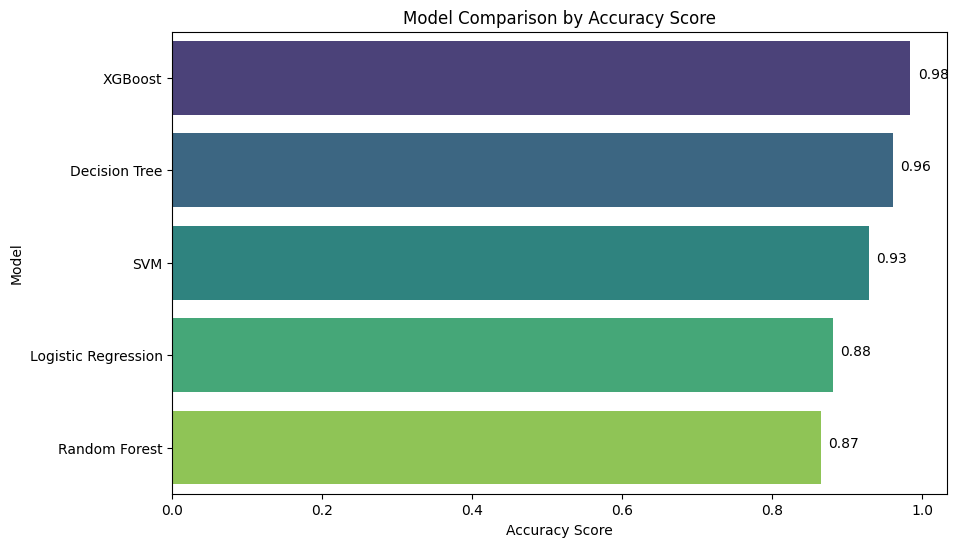

,Model,Accuracy_score
1,XGBoost,0.984127
2,Decision Tree,0.960317
3,SVM,0.928571
4,Logistic Regression,0.880952
5,Random Forest,0.865079


In [33]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost'],
    'Accuracy_score': [acc_lr, acc_dt, acc_rf, acc_svm, acc_xgb]

})
models

# Sort the DataFrame by accuracy score in descending order
models_sorted = models.sort_values(by='Accuracy_score', ascending=False)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy_score', y='Model', data=models_sorted, palette='viridis')

# Add labels and title for better readability
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Model Comparison by Accuracy Score')

# Annotate the bar plot with the accuracy scores
for index, value in enumerate(models_sorted['Accuracy_score']):
    plt.text(value + 0.01, index, f'{value:.2f}')

plt.show()

# show models accuracy descending orders
models_sorted.index = np.arange(1, len(models_sorted) + 1)
models_sorted

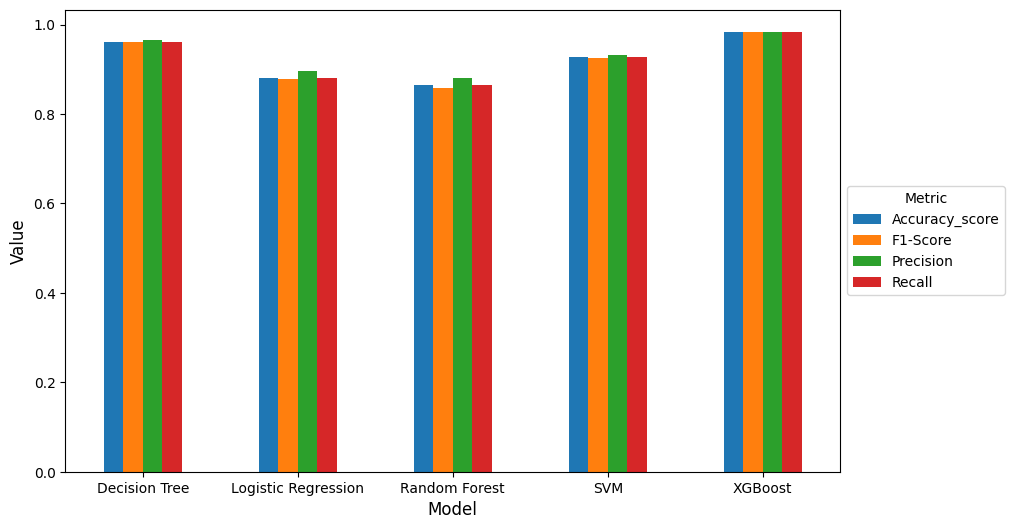

In [34]:
metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost'],
    'Accuracy_score': [acc_lr, acc_dt, acc_rf, acc_svm, acc_xgb],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_svm, precision_xgb],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_svm, recall_xgb],
    'F1-Score': [f1_lr, f1_dt, f1_rf, f1_svm, f1_xgb]
})

metrics_sorted = metrics.sort_values(by='Accuracy_score', ascending=False)

# Membuat plot bar chart
metrics_melted = metrics_sorted.melt(id_vars='Model', var_name='Metric', value_name='Value')


fig, ax = plt.subplots(figsize=(10, 6))
ax = metrics_melted.groupby(['Model', 'Metric']).Value.mean().unstack().plot(kind='bar', ax=ax, rot=0)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.legend(title='Metric', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


## Prediction the Model

Because training and modeling of the XGBoost model is the result of the model with the highest  level of accuracy, then I will use the XGBoost model to predict water quality. Since there is no dataset for testing, dummy data will be used.

In [35]:
df

,Temperatur,TDS,pH,BOD,COD,DO,CurahHujan,kelas
0,30.1,108.2,7.8,6.9,17.2,5.1,8.45,2
1,26.7,108.2,7.6,14.6,39.9,5.0,8.45,3
2,29.6,108.2,8.0,11.2,34.3,5.2,3.43,2
3,29.8,108.2,7.3,12.9,32.8,5.2,3.43,3
4,29.0,108.2,7.8,8.6,26.0,5.3,7.39,2
...,...,...,...,...,...,...,...,...
208,30.3,988.0,7.1,50.1,276.5,2.1,0.39,3
209,29.9,988.0,7.3,78.0,278.7,0.9,23.43,4
210,30.8,988.0,7.4,51.7,322.9,1.7,23.43,3
211,28.2,988.0,7.4,17.2,90.9,1.6,13.39,3


In [36]:
# XGBoost Accuracy
accuracy = accuracy_score(y_test, pred_xgb)
print(f'XGBoost Accuracy: {accuracy * 100:.2f}%')

XGBoost Accuracy: 98.41%


In [37]:
# Create new dummy data based on dataset features
# 'Temperatur', 'TDS', 'pH', 'BOD', 'COD', 'DO', 'CurahHujan'
new_data = np.array([[25.5, 250, 7.2, 3.5, 50, 6.0, 150]])

# Predict new class
predicted_class = model_xgb.predict(new_data)

print(f'Water Quality Class Prediction: {predicted_class[0]}')

Water Quality Class Prediction: 2


Confusion Matrix

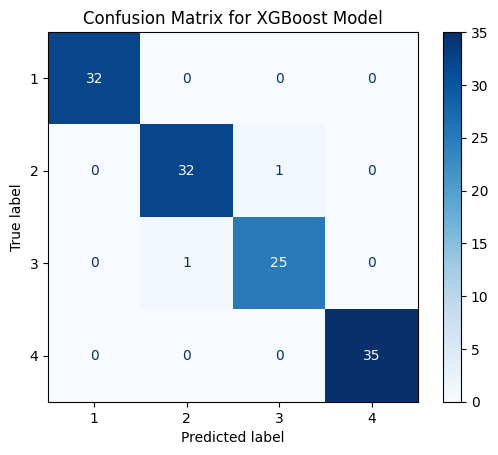

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_xgb)
class_labels = [1, 2, 3, 4]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost Model")
plt.show()